In [1]:
'''Entry point for the particle filtering code, use for the datasets *_FLU_HOSPITALIZATIONS.csv'''

import sys
sys.path.append('../') #appending the path is only necessary for the jupyter notebook

import numpy as np
from Implementations.algorithms.TimeDependentBeta import TimeDependentAlgo
from Implementations.resamplers.resamplers import PoissonResample,NBinomResample
from Implementations.solvers.DeterministicSolvers import LSODACalvettiSolver,LSODASolver,LSODASolverSEIARHD
from Implementations.perturbers.perturbers import MultivariatePerturbations
from utilities.Utils import Context,ESTIMATION
from functools import partial


'''First thing to do is set up the algorithm object, this is a class which encapsulates the whole particle filter, it contains information about the integrator, the perturber, the resampler, and a 
dataclass which holds metadata and setup information needed at runtime.'''

algo = TimeDependentAlgo(integrator = LSODASolver(),
                        perturb = MultivariatePerturbations(hyper_params={"h":0.5,"sigma1":0.1,"sigma2":0.1}),
                        resampler = NBinomResample(),
                        ctx=Context(population=7_780_000,
                                    state_size = 4,
                                    prior_weights=np.zeros(1000),
                                    pos_weights = np.zeros(1000),
                                    weight_ratio=np.ones(1000),
                                    seed_loc=[1],
                                    seed_size=0.005,
                                    forward_estimation=1,
                                    rng=np.random.default_rng(),
                        particle_count=10000))

algo.initialize(params={
"beta":ESTIMATION.VARIABLE,
"gamma":0.06,
"mu":0.004,
"q":0.1,
"eta":0.1,
"std":10,
"R":50,
"hosp":10,
"L":90,
"D":10,
}
,priors={"beta":partial(algo.ctx.rng.uniform,0.1,0.15), 
          "D":partial(algo.ctx.rng.uniform,0,15),
          })

'''Runs the PF over the specified data set for the specified length of time'''

#algo.print_particles()
algo.run(f'../datasets/AZ_FLU_HOSPITALIZATIONS.csv',200)



[8623 3987  738 ... 9011 1046 6524]
eta: 0.10000000000000002 gamma: 0.060000000000000026
Iteration: 0
[9463 8634 7166 ... 9082 3476  889]
eta: 0.10000000000000002 gamma: 0.060000000000000026
Iteration: 1
[2026 1900 9435 ... 9722  757 9049]
eta: 0.10000000000000002 gamma: 0.060000000000000026
Iteration: 2
[ 240 3053 6641 ...  716  545 5958]
eta: 0.10000000000000002 gamma: 0.060000000000000026
Iteration: 3
[1468  287 2974 ... 8500  675 5496]
eta: 0.10000000000000002 gamma: 0.060000000000000026
Iteration: 4
[2397 7047 7780 ... 5403 4608 4877]
eta: 0.10000000000000002 gamma: 0.060000000000000026
Iteration: 5
[9916 1887 8513 ... 3380 6929  414]
eta: 0.10000000000000002 gamma: 0.060000000000000026
Iteration: 6
[4644 4602 3618 ... 9166 7289 4396]
eta: 0.10000000000000002 gamma: 0.060000000000000026
Iteration: 7
[5580 2079 6146 ... 2715 3208 7608]
eta: 0.10000000000000002 gamma: 0.060000000000000026
Iteration: 8
[1553 2881 1548 ... 1952 7016 1302]
eta: 0.10000000000000002 gamma: 0.060000000000

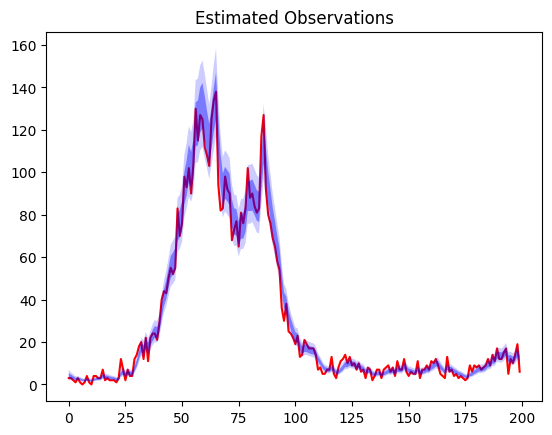

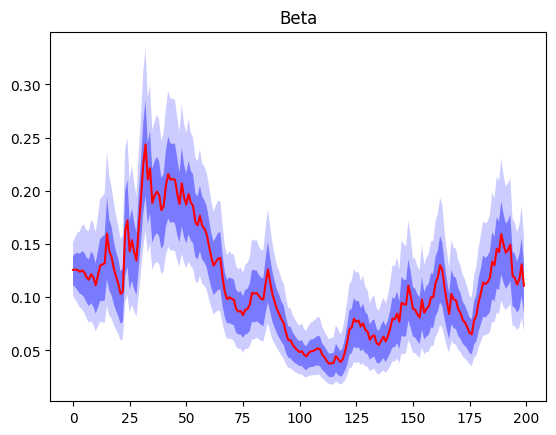

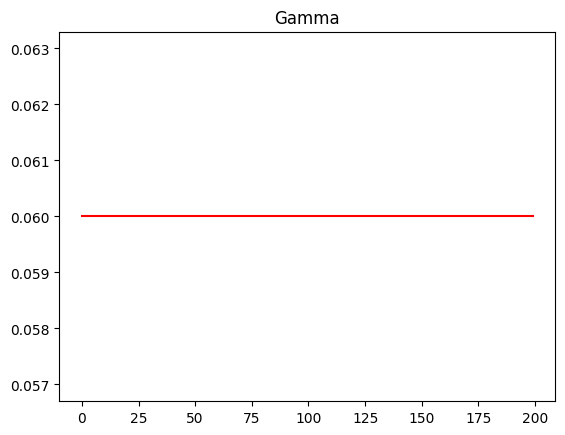

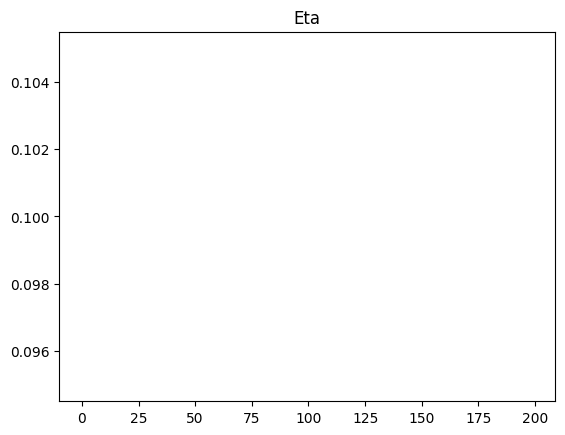

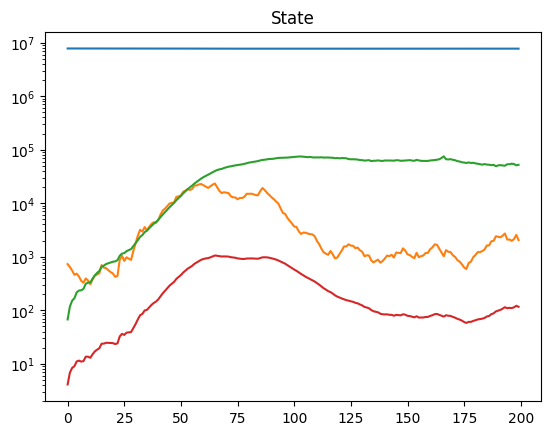

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

real_data = pd.read_csv('../datasets/AZ_FLU_HOSPITALIZATIONS.csv').to_numpy()
real_data = np.delete(real_data,0,1)

estimated_data = pd.read_csv('../datasets/particle_observation.csv').to_numpy()
estimated_data = np.delete(estimated_data,0,1)


t = 200

plt.title("Estimated Observations")

plt.fill_between(np.arange(0,t), estimated_data[:,3], estimated_data[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), estimated_data[:,6], estimated_data[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.plot(np.arange(0,t),real_data[0:t],color='red')
plt.show()

pf_beta = pd.read_csv('../datasets/average_beta.csv').to_numpy()
pf_beta = np.delete(pf_beta,0,1)




beta_quantiles = pd.read_csv('../datasets/beta_quantiles.csv').to_numpy()
beta_quantiles = np.delete(beta_quantiles,0,1)

pf_eta = pd.read_csv('../datasets/average_eta.csv').to_numpy()
pf_eta = np.delete(pf_eta,0,1)
eta_quantiles = pd.read_csv('../datasets/eta_quantiles.csv').to_numpy()
eta_quantiles = np.delete(eta_quantiles,0,1)

pf_gamma = pd.read_csv('../datasets/average_gamma.csv').to_numpy()
pf_gamma = np.delete(pf_gamma,0,1)
gamma_quantiles = pd.read_csv('../datasets/gamma_quantiles.csv').to_numpy()
gamma_quantiles = np.delete(gamma_quantiles,0,1)

pf_state = pd.read_csv('../datasets/ESTIMATED_STATE.csv').to_numpy()
pf_state = np.delete(pf_state,0,1)

plt.title("Beta")

plt.fill_between(np.arange(0,t), beta_quantiles[:,3], beta_quantiles[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), beta_quantiles[:,6], beta_quantiles[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.plot(pf_beta,color="red",zorder=12)
plt.savefig('Beta.png')
plt.show()

plt.title("Gamma")

plt.plot(pf_gamma,zorder=12,color = 'red')
plt.fill_between(np.arange(0,t), gamma_quantiles[:,3], gamma_quantiles[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), gamma_quantiles[:,6], gamma_quantiles[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.show()

plt.title("Eta")

plt.fill_between(np.arange(0,t), eta_quantiles[:,3], eta_quantiles[:,22-3], facecolor='blue', zorder=10,alpha = 0.2)
plt.fill_between(np.arange(0,t), eta_quantiles[:,6], eta_quantiles[:,22-6], facecolor='blue', zorder=11,alpha = 0.4)

plt.show()

plt.yscale('log')
plt.title("State")
plt.plot(pf_state)
plt.savefig('State.png')

